# Notebook 1: Network analysis for all Metrics
### iGED : Global Systems Dynamics Initiative

The main objective of this file is to analyze all global graph metrics in the following cities:

  *  Ciudad Autónoma de Buenos Aires (CABA)
  *  Ciudad de México (CDMX)
  *  Santiago de Chile (SCL)
  *  Montevideo (MTV)
  *  Madrid (MAD)
  *  Sao Paulo (SAO)
  *  Aguascalientes (AGS)
  *  Guadalajara (GDL)
  *  Pachuca (HGO)
  *  Oaxaca (OAX)
  *  Valencia (VAL)

and to obtain a Tidy DataFrame, in order to further our network analysis, for instance by finding the pairwise Pearson correlation between these metrics, or between these metrics and other studied metrics. 

### Part 1: Packages

In [2]:
#-------------------------------------------------------
# Importar paquetes a utilizar
#-------------------------------------------------------
import pandas as pd
import numpy as np 
import networkx as nx
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

ModuleNotFoundError: No module named 'networkx'

### Part 2: Obtaining GED data and Constructing the respective graphs

In [3]:
#---------------
# CSV: Nodes
#---------------
ags_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi AGS Stats.csv')             
caba_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi CABA Stats.csv')           #capital
cdmx_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi CDMX Stats.csv')           #capital
gdl_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi GDL Stats.csv') 
hgo_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Hidalgo Stats.csv')
mad_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Madrid Stats.csv')          #capital
mtv_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Montevideo Stats.csv')      #capital
oax_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Oaxaca Stats.csv')
sao_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Sao Paulo Stats.csv')       #capital
scl_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi SCL Stats.csv')             #capital
val_nd=pd.read_csv('Ecosystems_from_GED/Gephi_stats/Gephi Valencia Stats.csv')



#---------------
# CSV: Edges
#---------------
ags_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi AGS Edges.csv')
caba_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi CABA Edges.csv')           #capital
cdmx_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi CDMX Edges.csv')           #capital
gdl_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi GDL Edges.csv')
hgo_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Hidalgo Edges.csv')
mad_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Madrid Edges.csv')          #capital
mtv_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Montevideo Edges.csv')      #capital
oax_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Oaxaca Edges.csv')
sao_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Sao Paulo Edges.csv')       #capital
scl_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi SCL Edges.csv')             #capital
val_ed=pd.read_csv('Ecosystems_from_GED/Gephi_edges/Gephi Valencia Edges.csv')

In [1]:
def armar_grafo(nodes,edges,rol_str,weight_str):
    '''
    Función con la cual, a partir de una lista de nodos y conexiones, forma un grafo con NetworkX
    
    In:
    - nodes       lista de nodos
    - edges       lista de aristas
    - rol_str     un nombre para el parámetro que describe el rol de un actor
    - weight_str  un nombre para el parámetro que describe el peso de las aristas
    
    Out
    Un DiGrafo NetworkX llamado G.
    '''
    
    # DiGraph from edgelist
    G=nx.from_pandas_edgelist(edges,'Source','Target',edge_attr=["Weight"],create_using=nx.DiGraph())

    #create (node ->role(node)) dictionary 
    rol = {nid: nodes[nodes['Id']==nid][rol_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,rol,'rol')
    
    #create (node -> weight(node)) dictionarty
    weight = {nid: nodes[nodes['Id']==nid][weight_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,weight,'weight')
    
    return G

In [4]:
#---------------------------------
# NetworkX DiGraph construction
#---------------------------------

ags_G=armar_grafo(ags_nd,ags_ed,'role','weight')
caba_G=armar_grafo(caba_nd,caba_ed,'type','weight')
cdmx_G=armar_grafo(cdmx_nd,cdmx_ed,'rol estimado','weight')
gdl_G=armar_grafo(gdl_nd,gdl_ed,'type','weight')
hgo_G=armar_grafo(hgo_nd,hgo_ed,'type','weight')
mad_G=armar_grafo(mad_nd,mad_ed,'rol estimado','weight')
mtv_G=armar_grafo(mtv_nd,mtv_ed,'rol estimado','node size')
oax_G=armar_grafo(oax_nd,oax_ed,'rol','weight')
sao_G=armar_grafo(sao_nd,sao_ed,'rol estimado','weight')
scl_G=armar_grafo(scl_nd,scl_ed,'type','weight')
val_G=armar_grafo(val_nd,val_ed, 'type','weight')


#ahora vamos a salvar este trabajo y escribir estos grafos
nx.write_graphml(ags_G,'GraphMLs/AGS original graph.graphml')
nx.write_graphml(caba_G,'GraphMLs/CABA original graph.graphml')
nx.write_graphml(cdmx_G,'GraphMLs/CDMX original graph.graphml')
nx.write_graphml(gdl_G,'GraphMLs/GDL original graph.graphml')
nx.write_graphml(hgo_G,'GraphMLs/Pachuca original graph.graphml')
nx.write_graphml(mad_G,'GraphMLs/Madrid original graph.graphml')
nx.write_graphml(mtv_G,'GraphMLs/Montevideo original graph.graphml')
nx.write_graphml(oax_G,'GraphMLs/Oaxaca original graph.graphml')
nx.write_graphml(sao_G,'GraphMLs/Sao Paulo original graph.graphml')
nx.write_graphml(scl_G,'GraphMLs/Santiago original graph.graphml')
nx.write_graphml(val_G,'GraphMLs/Valencia original graph.graphml')


### Part 3: Attribute Mixing Matrices According to Role

Matriz de artibuto Rol para la ciudad de CABA

[[0.01508621 0.0387931  0.00862069 0.01724138 0.04741379 0.        ]
 [0.05603448 0.31896552 0.01077586 0.06896552 0.12715517 0.01939655]
 [0.         0.         0.         0.         0.         0.        ]
 [0.00431034 0.05603448 0.00431034 0.03017241 0.0237069  0.01077586]
 [0.01724138 0.05603448 0.         0.01508621 0.03232759 0.        ]
 [0.00215517 0.01508621 0.         0.         0.00431034 0.        ]]


Matriz de artibuto Rol para la ciudad de CDMX

[[0.00398406 0.02390438 0.00199203 0.00199203 0.01195219 0.        ]
 [0.03784861 0.51394422 0.02390438 0.06772908 0.10956175 0.02788845]
 [0.00199203 0.02191235 0.00398406 0.         0.         0.        ]
 [0.00199203 0.02988048 0.         0.00199203 0.00398406 0.00199203]
 [0.00199203 0.01992032 0.         0.00199203 0.00796813 0.00398406]
 [0.         0.05179283 0.0059761  0.0059761  0.00398406 0.00398406]]


Matriz de artibuto Rol para la ciudad de Santiago de Chile

[[0.        

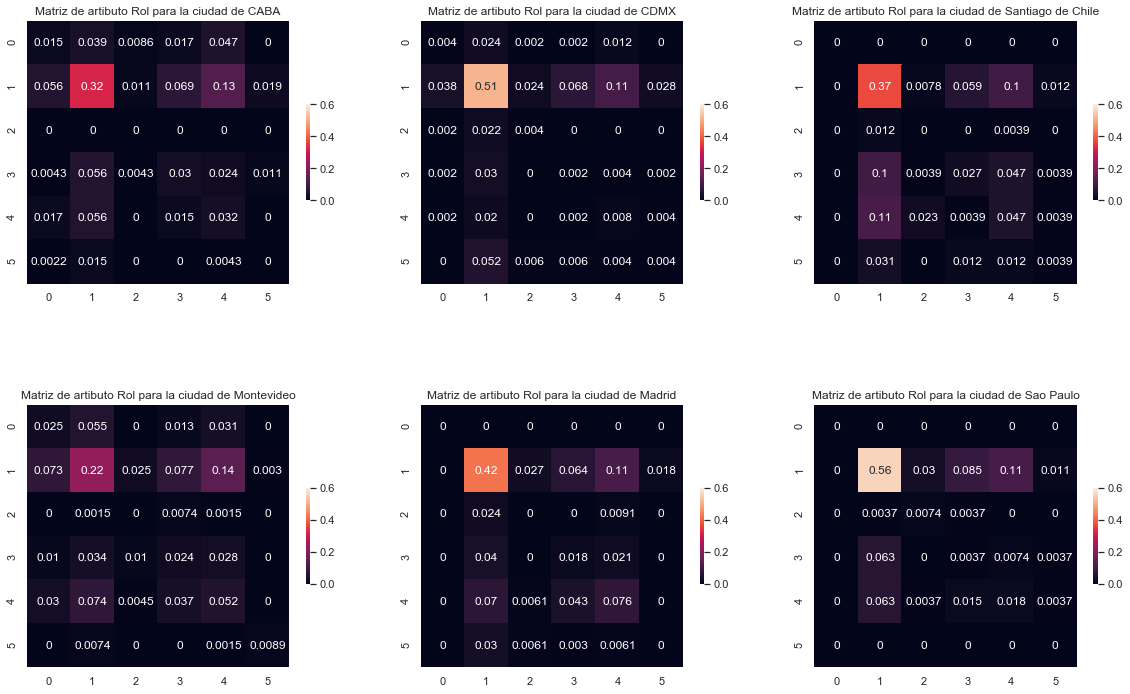

In [5]:
#-------------------------------------------------
# Attribute Mixing Matrices - Original graphs
#-------------------------------------------------
#       Obtenemos una matriz cuya entrada (i,j) es la fracción de aristas 
#       que van de un eje con rol i a un eje con rol j, en la red original


#cada rol lo asignamos a un índice del 1 al 5
rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

rol_map_ing={'Knowledge Generator':0,'Enabler':1,
             'Promoter':2,'Linker':3,'Articulator':4,'Community':5}

capitals = {'CABA': caba_G, 'CDMX':cdmx_G, 'Santiago de Chile': scl_G, 
            'Montevideo': mtv_G, 'Madrid': mad_G, 'Sao Paulo': sao_G}

#aquí vamos a almacenar las matrices
attr_mix_matrices = capitals 

#conseguimos cada una de las attribute mixing matrices
for capital_str in capitals.keys():
    if capital_str=='Montevideo':
        print('Matriz de artibuto Rol para la ciudad de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_ing)
        print(M)
        print('')
        print('')
    else:
        print('Matriz de artibuto Rol para la ciudad de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals[capital_str],'rol',mapping=rol_map_esp)
        print(M)
        print('')
        print('')
    attr_mix_matrices[capital_str] = M

            
# Creamos la instancia de una figura, con subplots
fig = plt.figure(figsize = (20,20)) # ancho x alto

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Matriz de artibuto Rol para la ciudad de CABA')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Matriz de artibuto Rol para la ciudad de CDMX')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Matriz de artibuto Rol para la ciudad de Santiago de Chile')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Matriz de artibuto Rol para la ciudad de Montevideo')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Matriz de artibuto Rol para la ciudad de Madrid')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Matriz de artibuto Rol para la ciudad de Sao Paulo')


# We use ax parameter to tell seaborn which subplot to use for this plot
heat_caba = sns.heatmap(data=attr_mix_matrices['CABA'], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)

heat_cdmx = sns.heatmap(data=attr_mix_matrices['CDMX'], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
heat_scl = sns.heatmap(data=attr_mix_matrices['Santiago de Chile'], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
heat_mtv = sns.heatmap(data=attr_mix_matrices['Montevideo'], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
heat_mad = sns.heatmap(data=attr_mix_matrices['Madrid'], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      
heat_sao = sns.heatmap(data=attr_mix_matrices['Sao Paulo'], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      


fig.savefig('Not_used_anymore/all_heatmaps.png', dpi=400)

#fig

In [6]:
#----------------------
# Subgrafos Nucleares 
#----------------------
#    Obtenemos los -core- nodes (nodos núcleo) de cada una de las redes capitales, 
#    donde el grado total de un nodo núcleo es al menos 3

caba_core=nx.k_core(caba_G,k=3)
cdmx_core=nx.k_core(cdmx_G,k=3)
scl_core=nx.k_core(scl_G,k=3)
mad_core=nx.k_core(mad_G,k=3)
mtv_core=nx.k_core(mtv_G,k=3)
sao_core=nx.k_core(sao_G,k=3)

#----------------------
# GraphMLs Nucleares
#----------------------
#    Ahora, convertimos cada uno de los subgrafos nucleares que obtuvimos
#    en un archivo .graphml

nx.write_graphml(caba_core,'SubEcosystems/Gephi_core/CABA core graph.graphml')
nx.write_graphml(cdmx_core,'SubEcosystems/Gephi_core/CDMX core graph.graphml')
nx.write_graphml(scl_core,'SubEcosystems/Gephi_core/Scl core graph.graphml')
nx.write_graphml(mad_core,'SubEcosystems/Gephi_core/Mad core graph.graphml')
nx.write_graphml(mtv_core,'SubEcosystems/Gephi_core/Mtv core graph.graphml')
nx.write_graphml(sao_core,'SubEcosystems/Gephi_core/Sao core graph.graphml')

#----------------------
# Subgrafos Corteza 
#----------------------
#    Obtenemos los -crust- nodes (nodos corteza) de cada una de las redes capitales, 
#    donde el grado total de un nodo corteza es menor a 3

caba_crust=nx.k_crust(caba_G,k=3)
cdmx_crust=nx.k_crust(cdmx_G,k=3)
scl_crust=nx.k_crust(scl_G,k=3)
mad_crust=nx.k_crust(mad_G,k=3)
mtv_crust=nx.k_crust(mtv_G,k=3)
sao_crust=nx.k_crust(sao_G,k=3)

#----------------------
# GraphMLs Corteza  
#----------------------
#    Ahora, convertimos cada uno de los subgrafos corteza que obtuvimos
#    en un archivo .graphml

nx.write_graphml(caba_crust,'SubEcosystems/Gephi_crust/CABA crust graph.graphml')
nx.write_graphml(cdmx_crust,'SubEcosystems/Gephi_crust/CDMX crust graph.graphml')
nx.write_graphml(scl_crust,'SubEcosystems/Gephi_crust/Scl crust graph.graphml')
nx.write_graphml(mad_crust,'SubEcosystems/Gephi_crust/Mad crust graph.graphml')
nx.write_graphml(mtv_crust,'SubEcosystems/Gephi_crust/Mtv crust graph.graphml')
nx.write_graphml(sao_crust,'SubEcosystems/Gephi_crust/Sao crust graph.graphml')

Matriz de artibuto Rol para el núcleo (k=3) de CABA

[[0.004 0.028 0.004 0.016 0.06  0.   ]
 [0.032 0.276 0.008 0.08  0.192 0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.068 0.    0.024 0.032 0.004]
 [0.016 0.084 0.    0.016 0.044 0.   ]
 [0.004 0.004 0.    0.    0.004 0.   ]]


Matriz de artibuto Rol para el núcleo (k=3) de CDMX

[[0.         0.04694836 0.         0.         0.02816901 0.        ]
 [0.03755869 0.49765258 0.         0.05633803 0.14084507 0.03286385]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.03286385 0.         0.         0.00469484 0.        ]
 [0.00469484 0.02816901 0.         0.00469484 0.00938967 0.00469484]
 [0.         0.05633803 0.         0.00469484 0.00469484 0.00469484]]


Matriz de artibuto Rol para el núcleo (k=3) de Santiago de Chile

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.35       0.         0.075      0.16666667 0.00833333]
 [0.         0.         0.         0

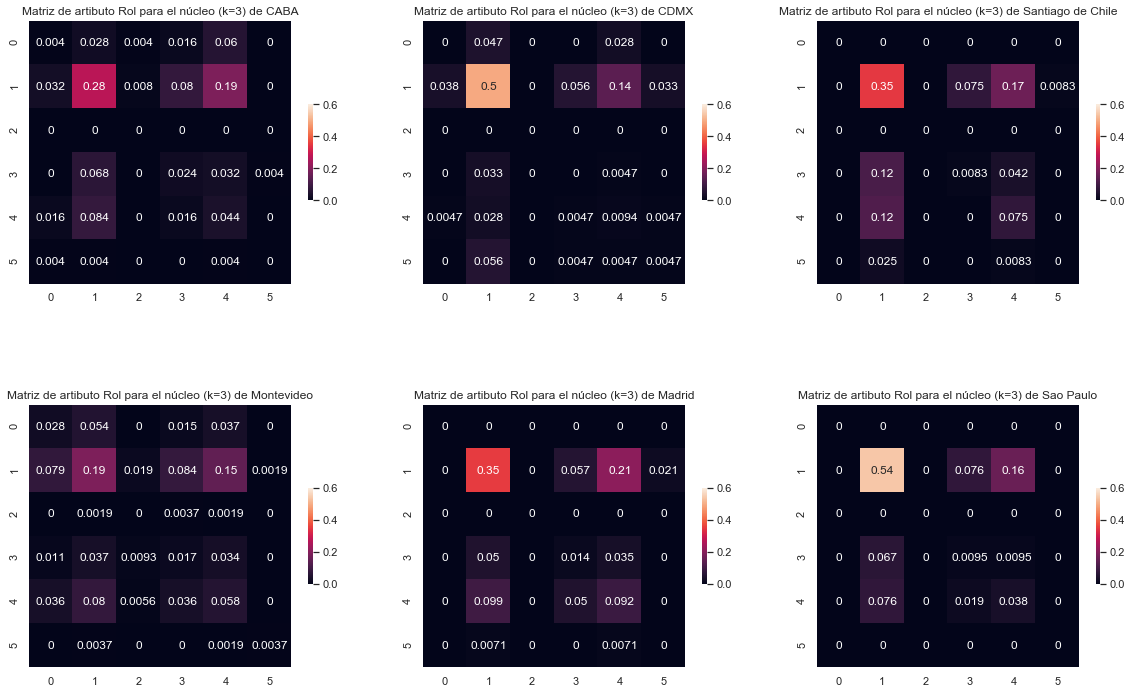

In [7]:
#------------------------------------------------
#  Attribute Mixing Matrices - Core graphs
#------------------------------------------------
#     Para cada uno de los grafos corteza que conseguimos, 
#     Obtenemos una matriz cuya entrada (i,j) es la fracción 
#     de aristas que van de un eje con rol i a un eje con rol j


rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

rol_map_ing={'Knowledge Generator':0,'Enabler':1,'Promoter':2,
             'Linker':3,'Articulator':4,'Community':5}

capitals_cores={'CABA': caba_core, 'CDMX':cdmx_core, 'Santiago de Chile': scl_core, 
                'Montevideo': mtv_core, 'Madrid': mad_core, 'Sao Paulo': sao_core}
attr_mix_matrices = capitals_cores 
        


for capital_str in capitals.keys():
    if capital_str=='Montevideo':
        print('Matriz de artibuto Rol para el núcleo (k=3) de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals_cores[capital_str],'rol',mapping=rol_map_ing)
        print(M)
        print('')
        print('')
    else:
        print('Matriz de artibuto Rol para el núcleo (k=3) de '+capital_str)
        print('')
        M=nx.attribute_mixing_matrix(capitals_cores[capital_str],'rol',mapping=rol_map_esp)
        print(M)
        print('')
        print('')
    attr_mix_matrices[capital_str] = M

        
        
# Creamos la instancia de una figura, con subplots
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Matriz de artibuto Rol para el núcleo (k=3) de CABA')

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Matriz de artibuto Rol para el núcleo (k=3) de CDMX')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Matriz de artibuto Rol para el núcleo (k=3) de Santiago de Chile')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Matriz de artibuto Rol para el núcleo (k=3) de Montevideo')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Matriz de artibuto Rol para el núcleo (k=3) de Madrid')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Matriz de artibuto Rol para el núcleo (k=3) de Sao Paulo')


# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=attr_mix_matrices['CABA'], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['CDMX'], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Santiago de Chile'], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Montevideo'], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)
sns.heatmap(data=attr_mix_matrices['Madrid'], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      
sns.heatmap(data=attr_mix_matrices['Sao Paulo'], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12}, vmin=0.0, vmax=0.6)      


#fig


### Part 4: Tidy DataFrame with all graph metrics

In [8]:
#----------------------------
# Medidas Globales
#----------------------------
#     Ahora obtenemos, para cada una de las capitales, una serie 
#     pandas.core.series.Series, utilizando la función mean(), 
#     con la que obtenemos los promedios de cada columna. 
#     Algunos de ellos son:
#           - avg strength                    fuerza promedio de sus interacciones (1-5)
#           - weight                          promedio del peso de los nodos
#           - Degree                          promedio de grado, hacia o desde el nodo
#           - Weighted Degree                 promedio de grado, hacia o desde el nodo de acuerdo a intensidades
#           - Eccentricity                   promedio de centralidades
#           - closnesscentrality              
#           - harmonicclosnesscentrality      
#           - betweenesscentrality  
#           - clustering                     promedio de coeficiente de aglomeración
#           - Authority                       promedio de valor autoridad de los nodos (HITS)
#           - Authority                       promedio de valor hub de los nodos (HITS)
#           - triangles                       número de triágulos
#           - eigencentrality                 promedio de centralidades eigenvectores

capitals_stats={'CABA': caba_nd, 'CDMX':cdmx_nd, 'Santiago de Chile': scl_nd, 
                'Montevideo': mtv_nd, 'Madrid': mad_nd, 'Sao Paulo': sao_nd}


averages={city: stats.mean() for city,stats in capitals_stats.items()}
#averages['Sao Paulo']

In [9]:
countries={'Montevideo':'Uruguay', 'CABA':'Argentina', 'CDMX':'México',
          'Madrid':'España', 'Sao Paulo': 'Brasil', 'Santiago de Chile': 'Chile'}


list_concat=[]
for city,avg in averages.items():
    datafr=avg.copy().to_frame().T
    
    #borramos del set de columnas a aquellos atributos que no son significantes 
    datafr.drop(['timeset', 'componentnumber'], axis=1, inplace=True)
    if 'type' in datafr.columns:
        datafr.drop(['type'], axis=1, inplace=True)
    
    #añadimos datafr a la lista de dataframes que vamos a concatenar
    list_concat.append(datafr)
    
    #añadimos el atributo que corresponde a el nombre de ciudad y país
    datafr.insert(0, 'País', [countries[city]], True) 
    datafr.insert(0, 'Ciudad', [city], True) 

df_concat=pd.concat(list_concat, ignore_index=True)
df_concat

,Ciudad,País,mentions,avg strength,weight,indegree,outdegree,Degree,weighted indegree,weighted outdegree,...,modularity_class,Authority,Hub,strongcompnum,clustering,triangles,eigencentrality,ego,pageranks,node size
0,CABA,Argentina,2.285088,3.244633,1.481579,2.192982,2.192982,4.385965,7.008772,7.008772,...,5.850877,0.036946,0.036946,96.763158,0.148791,2.434211,0.093111,NaN,NaN,NaN
1,CDMX,México,NaN,3.477388,1.388629,1.829431,1.829431,3.658863,6.481605,6.481605,...,4.270903,NaN,NaN,127.060201,0.075940,0.862876,0.104015,NaN,NaN,NaN
2,Santiago de Chile,Chile,2.097436,3.417211,1.462564,1.974359,1.974359,3.948718,6.882051,6.882051,...,3.907692,0.040609,0.040609,NaN,0.134037,2.153846,0.074438,0.133333,0.00392,NaN
3,Montevideo,Uruguay,4.065657,3.227742,NaN,3.873737,3.873737,7.747475,12.969697,12.969697,...,2.666667,NaN,NaN,67.898990,0.207747,11.060606,0.107790,NaN,NaN,2.749495
4,Madrid,España,1.958159,3.518387,1.362343,1.895397,1.895397,3.790795,6.430962,6.430962,...,5.050209,NaN,NaN,89.757322,0.120510,1.330544,0.065103,NaN,NaN,NaN
5,Sao Paulo,Brasil,1.800926,3.430669,1.253704,1.685185,1.685185,3.370370,5.847222,5.847222,...,5.564815,0.039103,0.039103,92.027778,0.129928,0.916667,0.144046,NaN,NaN,NaN


In [10]:
df_concat.isnull().sum()

Ciudad                        0
País                          0
mentions                      1
avg strength                  0
weight                        1
indegree                      0
outdegree                     0
Degree                        0
weighted indegree             0
weighted outdegree            0
Weighted Degree               0
Eccentricity                  0
closnesscentrality            0
harmonicclosnesscentrality    0
betweenesscentrality          0
modularity_class              0
Authority                     3
Hub                           3
strongcompnum                 1
clustering                    0
triangles                     0
eigencentrality               0
ego                           5
pageranks                     5
node size                     5
dtype: int64

In [11]:
#Quitar promedios que en la pagina no mencionan que describen una propiedad global del grafo

df_concat=df_concat.drop('closnesscentrality',axis=1)
df_concat=df_concat.drop('harmonicclosnesscentrality',axis=1)
df_concat=df_concat.drop('modularity_class',axis=1)
df_concat=df_concat.drop('triangles',axis=1)
df_concat=df_concat.drop('eigencentrality',axis=1)
df_concat=df_concat.drop('pageranks',axis=1)
df_concat=df_concat.drop('ego',axis=1)
df_concat=df_concat.drop('betweenesscentrality',axis=1)
df_concat=df_concat.drop('Hub',axis=1)

In [12]:
#Quitar promedios que son redundantes, ya que al hacer el análisis presentaron correlación de 1

df_concat=df_concat.drop('indegree',axis=1)
df_concat=df_concat.drop('outdegree',axis=1)
df_concat=df_concat.drop('weighted indegree',axis=1)
df_concat=df_concat.drop('weighted outdegree',axis=1)

In [13]:
df_concat['weight'][3]=df_concat['node size'][3]
df_concat=df_concat.drop('node size',axis=1)
df_concat=df_concat.drop('strongcompnum',axis=1)
df_concat=df_concat.drop('Authority',axis=1)

#una de las columnas que generaba una entrada NaN
df_concat=df_concat.drop('mentions',axis=1)

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_concat

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricity,clustering
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928


Vamos a computar las siguientes características globales:

* Diámetro
* Radio
* Small Worldness
* *Camino más corto promedio*
* *Transitividad*
* *Eficiencia Global*
* *Coeficiente de Asortatividad*
* Modularidad**

Las métricas arriba escritas en fuente normal no están definidas en los grafos dirigidos correspondientes a las capitales estudiadadas. Las que están en cursiva sí están definidas en grafos dirigidos, pero se computan en laversión no dirigida de los grafos que corresponden a las capitales. En particularidad, Modularidad fue computado manualmente en Gephi.


In [15]:
#------------------
# Small Worldness
#------------------

'''
#networkx.algorithms.smallworld.random_reference
print('----------------------------------')
print('Small Worldness en Cores dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph,niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('----------------------------------')
print('Small Worldness en Cores no dirigidos')
print('----------------------------------')

for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(nx.algorithms.smallworld.sigma(graph.to_undirected(),niter=1,nrand=2)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 




PRINT STATEMENT:

----------------------------------
Small Worldness en Cores dirigidos
----------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

----------------------------------
Small Worldness en Cores no dirigidos
----------------------------------
CABA: 0.9608066521709907

CDMX: 0.6771493264436462

Santiago de Chile: 0.906813593858747

Montevideo: 1.2745185062977642

Madrid: 1.1410329702664386

Sao Paulo: 1.211793728337516

'''

#    Por motivos de tiempo y de consistencia de nuestros datos 
#    (esta medida se computa a partir de una red al azar, entonces hay variabilidad),
#    decidimos tomar una medida de Small worldness, 
#    registrarlo en una tabla y luego hacer el input manualmente. 

small_worldness = [0.9608066521709907, 
                  0.6771493264436462,
                  0.906813593858747,
                  1.2745185062977642,
                  1.1410329702664386,
                  1.211793728337516]

In [16]:
#-----------------
#  Modularidades
#-----------------
#     Estas medidas fueron tomadas no por medio de este programa, sino manualmente desde el programa Gephi
#     Metodología:
#        Tomamos tres medidas en cada red, con cada una de las resoluciones 0.8, 1.0, 1.2, con o sin ejes
#
#        Network       (CABA, CDMX, MAD, MTV SAO, SCL)
#        Resolution    (0.8, 1.0, 1.2)  
#        Edge weights  (Y/N)
#        
#        Y luego de ello tomamos la mediana de las tres medidas de resolución, a modo de tomar en cuenta variabilidad



'''
df_concat['Modularidad con pesos (0.8)'] = [0.402, 0.484, 0.530, 0.472, 0.611, 0.686]
df_concat['Modularidad con pesos (1.0)'] = [0.524, 0.628, 0.530, 0.611, 0.610, 0.682]
df_concat['Modularidad con pesos (1.2)'] = [0.654, 0.776, 0.524, 0.756, 0.612, 0.673]


df_concat['Modularidad sin pesos (0.8)'] = [0.497, 0.602, 0.496, 0.353, 0.568, 0.673]
df_concat['Modularidad sin pesos (1.0)'] = [0.493, 0.604, 0.500, 0.348, 0.572, 0.664]
df_concat['Modularidad sin pesos (1.2)'] = [0.499, 0.601, 0.505, 0.337, 0.563, 0.661]

df_concat
'''

"\ndf_concat['Modularidad con pesos (0.8)'] = [0.402, 0.484, 0.530, 0.472, 0.611, 0.686]\ndf_concat['Modularidad con pesos (1.0)'] = [0.524, 0.628, 0.530, 0.611, 0.610, 0.682]\ndf_concat['Modularidad con pesos (1.2)'] = [0.654, 0.776, 0.524, 0.756, 0.612, 0.673]\n\n\ndf_concat['Modularidad sin pesos (0.8)'] = [0.497, 0.602, 0.496, 0.353, 0.568, 0.673]\ndf_concat['Modularidad sin pesos (1.0)'] = [0.493, 0.604, 0.500, 0.348, 0.572, 0.664]\ndf_concat['Modularidad sin pesos (1.2)'] = [0.499, 0.601, 0.505, 0.337, 0.563, 0.661]\n\ndf_concat\n"

In [22]:
#--------------------------------
# Central point of Dominance
#--------------------------------


def central_point_dominance(G):
    betwennesses = nx.betweenness_centrality(G)
    b_max = max(betwennesses.values())
    N = len(betwennesses.keys())
    count = 0
    for i, b_i in betwennesses.items():
        count += ( b_max - b_i )/(N-1)
    return count


print('-------------------------------------------------')
print('Central point of dominance en grafos dirigidos')
print('-------------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(central_point_dominance(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------------')
print('Central point of dominance en grafos no dirigidos')
print('-------------------------------------------------')

cpds=[]
for city, graph in capitals.items():
    try:
        cpd=central_point_dominance(graph.to_undirected())
        print(city+str(': ')+str(cpd))
        cpds.append(cpd)
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

cpds

-------------------------------------------------
Central point of dominance en grafos dirigidos
-------------------------------------------------
CABA: 0.09682770924851827

CDMX: 0.055367592453865994

Santiago de Chile: 0.15724646756546523

Montevideo: 0.077628900021557

Madrid: 0.0865947566252448

Sao Paulo: 0.08343939386281077

-------------------------------------------------
Central point of dominance en grafos no dirigidos
-------------------------------------------------
CABA: 0.2513630404294009

CDMX: 0.2021890740713214

Santiago de Chile: 0.5254322122333539

Montevideo: 0.17867930592282757

Madrid: 0.18370152799003858

Sao Paulo: 0.23686599553638013



[0.2513630404294009,
 0.2021890740713214,
 0.5254322122333539,
 0.17867930592282757,
 0.18370152799003858,
 0.23686599553638013]

In [23]:
#--------------------------------
# Spectral Radius
#--------------------------------
#     the smaller the spectral radius rho, the higher the probability of 'virus infection' tau, 
#     the more difficult it is for an idea to spread in the innovative network, 
#     namely, the less efficient

import numpy.linalg

def spectral_radius(G):
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    e_abs = [abs(x) for x in e]
    return max(e_abs)


print('-------------------------------------------------')
print('Radio Espectral en grafos dirigidos')
print('-------------------------------------------------')
for city, graph in capitals.items():
    try:
        print(city+str(': ')+str(spectral_radius(graph)))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('')

print('-------------------------------------------------')
print('Radio Espectral en grafos no dirigidos')
print('-------------------------------------------------')

spectral_radii = []
for city, graph in capitals.items():
    try:
        sr=spectral_radius(graph.to_undirected())
        spectral_radii.append(sr)
        print(city+str(': ')+str(sr))
        print('')
    except:
        print(city+str(': ')+str(float('inf')))
        print('') 

print(spectral_radii)

-------------------------------------------------
Radio Espectral en grafos dirigidos
-------------------------------------------------
CABA: inf

CDMX: inf

Santiago de Chile: inf

Montevideo: inf

Madrid: inf

Sao Paulo: inf

-------------------------------------------------
Radio Espectral en grafos no dirigidos
-------------------------------------------------
CABA: 1.8679496727413827

CDMX: 1.909881341485432

Santiago de Chile: 1.8899687417091213

Montevideo: 1.7775046620196777

Madrid: 1.9196432998754678

Sao Paulo: 1.982719811731104

[1.8679496727413827, 1.909881341485432, 1.8899687417091213, 1.7775046620196777, 1.9196432998754678, 1.982719811731104]


In [24]:
def core_ratio(G):
    return len(nx.k_core(G,k=2).nodes())/len(G.nodes())

In [25]:
def rich_club_coeffs(G):
    t_ok = True
    t = 0
    d = dict()
    while t_ok:
        nodes_large_degree=[]
        for x in G.nodes():
            if G.degree(x)>t:
                nodes_large_degree.append(x)
        core = G.subgraph(nodes_large_degree)
        edges_core = len(core.edges())
        nodes_core = len(core.nodes())
        if nodes_core<=1:
            t_ok = False
            break
        d[t] = (2*edges_core)/(nodes_core*(nodes_core-1))
        t += 1 
    return d        

def max_rich_club(G):
    #rich_club_1=nx.algorithms.rich_club_coefficient(G, normalized=False)
    rich_club=rich_club_coeffs(G)
    max_i=0
    
    for i in range(len(rich_club)):
        if rich_club[i]>rich_club[max_i]:
            max_i=i
    #print(max_i)
    return rich_club[max_i]

In [26]:
capitals = {'CABA': caba_G, 'CDMX':cdmx_G, 'Santiago de Chile': scl_G, 'Montevideo': mtv_G, 'Madrid': mad_G, 'Sao Paulo': sao_G}

#las columnas que vamos a aregar al DataFrame
diameter = [0]*len(capitals)
radius = [0]*len(capitals)
avg_shortest_path_length = [0]*len(capitals)
transitivity = [0]*len(capitals)
global_efficiency = [0]*len(capitals)
modularity = [0]*len(capitals)

small_worldness = [0.9608066521709907, 
                  0.6771493264436462,
                  0.906813593858747,
                  1.2745185062977642,
                  1.1410329702664386,
                  1.211793728337516]  

rich_club_coefficient = [0]*len(capitals)
# trophic_incoherence= [0]*len(capitals)
# assort_coeff = [0]*len(capitals)
core_rate= [0]*len(capitals)




for city, graph in capitals.items():
    city_index=df_concat.index[df_concat['Ciudad']==city].tolist()[0]
    
    #conseguimos cada parámetro para esta ciudad
    undirected=nx.to_undirected(graph)
    diameter[city_index] =                     nx.diameter(undirected)
    radius[city_index] =                       nx.radius(undirected)
    avg_shortest_path_length[city_index] =     nx.average_shortest_path_length(undirected)
    transitivity[city_index] =                 nx.transitivity(undirected)
    global_efficiency[city_index] =            nx.global_efficiency(undirected)
    #small_worldness precomputado
    #modularidad precomputada
    rich_club_coefficient[city_index] =        max_rich_club(undirected)  
    #trophic_incoherence[city_index]=          nx.algorithms.centrality.trophic_incoherence_parameter(graph)
    #assort_coeff[city_index]=                 nx.algorithms.degree_assortativity_coefficient(graph)
    core_rate[city_index]=                     core_ratio(undirected)


    
    
    
df_concat['Diámetro'] = diameter
df_concat['Radio'] = radius
df_concat['Camino más corto promedio'] = avg_shortest_path_length
df_concat['Transitividad'] = transitivity
df_concat['Eficiencia Global'] = global_efficiency
df_concat['Small Worldness'] = small_worldness
df_concat['Rich Club Coefficient'] = rich_club_coefficient
#df_concat['Trophic Incoherence'] = trophic_incoherence
#df_concat['Coeficiente de Asortatividad'] = assort_coeff
df_concat['Core Ratio'] = core_rate
df_concat['Central Point Dominance'] = [round(elem,3) for elem in cpds]
df_concat['Spectral radius'] = [round(elem,3) for elem in spectral_radii]

df_concat['Modularidad con pesos (1.0)'] = [0.524, 0.628, 0.530, 0.611, 0.610, 0.682]


df_concat

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricity,clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius,Modularidad con pesos (1.0)
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,0.866667,0.495614,0.251,1.868,0.524
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,0.361111,0.421405,0.202,1.910,0.628
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,1.000000,0.430769,0.525,1.890,0.530
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,1.000000,0.565657,0.179,1.778,0.611
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,1.000000,0.439331,0.184,1.920,0.610
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,0.222222,0.421296,0.237,1.983,0.682


In [27]:
#Cambiar los nombres de los atributos del DataFrame
#algunos nombres de columnas no fueron modificados para facilitar legibilidad
df_concat.rename(columns={'Eccentricity': 'Eccentricidad', 'clustering':'Clustering'}, inplace=True)
df_concat

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius,Modularidad con pesos (1.0)
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,0.866667,0.495614,0.251,1.868,0.524
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,0.361111,0.421405,0.202,1.910,0.628
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,1.000000,0.430769,0.525,1.890,0.530
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,1.000000,0.565657,0.179,1.778,0.611
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,1.000000,0.439331,0.184,1.920,0.610
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,0.222222,0.421296,0.237,1.983,0.682


In [28]:
#df_concat.to_csv('Referenced_CSVs/Tidy_DataFrame.csv',index=False)

### Part 5: Explorando el caso de Oaxaca y Santiago de Chile

Una de las observaciones que hizo el equipo de GED fue acerca de las redes de Oaxaca y Santiago de Chile. En Oaxaca, el nodo más prominente es IODEMC, mientras que en SCL el nodo más prominente es CORFO. Ambos nodos presentan mayor número de menciones, mayor número de flechas dirigidas hacia dichos nodos, y mayor grado. Por ende, estos nodos también resultan prominentes en casi todas las métricas nodales.

Sin embargo, al remover IODEMC de Oaxaca, la red se desestabiliza, mientras que al remover CORFO de SCL, la red no logra desestabilizarse tanto como la red previa.

En las siguientes medidas tomadas, se utilizará la construcción de multigrafo cuando sea posible, con el fin de dar importancia a una pareja de instituciones colaborando más de una vez.


In [29]:
from statistics import mean 
from statistics import stdev

In [30]:
def armar_multigrafo(nodes,edges,rol_str,weight_str):
    '''
    Función con la cual, a partir de una lista de nodos y conexiones, forma un grafo con NetworkX
    
    In:
    - nodes       lista de nodos
    - edges       lista de aristas
    - rol_str     un nombre para el parámetro que describe el rol de un actor
    - weight_str  un nombre para el parámetro que describe el peso de las aristas
    
    Out
    Un MultiDiGrafo NetworkX llamado G.
    '''
    
    #crea un grafo dirigido a partir de la lista edges
    G=nx.from_pandas_edgelist(edges,'Source','Target',edge_attr=["Weight"],create_using=nx.MultiDiGraph())

    #rol es un diccionario que manda cada id de un nodo a el atributo correspondiente a rol
    rol = {nid: nodes[nodes['Id']==nid][rol_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,rol,'rol')
    
    #weight es un diccionario que manda cada id de un nodo a el atributo correspondiente al peso de nodo
    weight = {nid: nodes[nodes['Id']==nid][weight_str].values[0] for nid in nodes['Id']}
    nx.set_node_attributes(G,weight,'weight')
    
    return G

In [31]:
oax_G_m=armar_multigrafo(oax_nd,oax_ed,'rol','weight')
scl_G_m=armar_multigrafo(scl_nd,scl_ed,'type','weight')

In [32]:
#------------------------
# Triangles
#------------------------

#obtaining IODEMC's triangle number in OAX's network
print( 'Triángulos alrededor de IODEMC: '+str(nx.triangles(oax_G.to_undirected(), 'IODEMC')) )

#obtaining CORFO's triangle number in SCL's network
print( 'Triángulos alrededor de CORFO: '+str(nx.triangles(scl_G.to_undirected(), 'CORFO')) )



Triángulos alrededor de IODEMC: 37
Triángulos alrededor de CORFO: 77


In [33]:
#------------------------
# Path length
#------------------------
#average shortest path length from any other node to our nodes of interest.

#obtaining IODEMC's path length in OAX's network
print( 'Camino más corto promedio hacia IODEMC: '+str( mean(nx.shortest_path_length(oax_G, 'IODEMC').values()) ) )

#obtaining CORFO's path length in SCL's network
print( 'Camino más corto promedio hacia CORFO: '+str( mean(nx.shortest_path_length(scl_G, 'CORFO').values()) ) )

Camino más corto promedio hacia IODEMC: 2.2134831460674156
Camino más corto promedio hacia CORFO: 2.973333333333333


In [34]:
#------------------------
# Global efficiency
#------------------------
#average shortest path length from any other node to our nodes of interest.

#obtaining IODEMC's global efficiency in OAX's network
shortest_path_lengths_oax = nx.shortest_path_length(oax_G, 'IODEMC')
del (shortest_path_lengths_oax['IODEMC'])
print( 'Eficiencia global de IODEMC: '+str(mean(shortest_path_lengths_oax.values())) ) 

#obtaining CORFO's global efficiency in SCL's network
shortest_path_lengths_scl = nx.shortest_path_length(scl_G, 'CORFO')
del (shortest_path_lengths_scl['CORFO'])
print( 'Eficiencia Global de CORFO: '+ str(mean(shortest_path_lengths_scl.values())) )

Eficiencia global de IODEMC: 2.2386363636363638
Eficiencia Global de CORFO: 2.9932885906040267


In [35]:
#------------------------
# Local efficiency
#------------------------
#average shortest path length from any neighbor node to our nodes of interest.

def nodes_connected(G, u, v):
    return u in G.neighbors(v)


#obtaining IODEMC's global efficiency in OAX's network
shortest_paths_ngb_oax = {key:value for key,value in shortest_path_lengths_oax.items() if 
                          nodes_connected(oax_G, 'IODEMC', key)}
print( mean([1/x for x in shortest_paths_ngb_oax.values()]) ) 

#obtaining CORFO's global efficiency in SCL's network
shortest_paths_ngb_scl = {key:value for key,value in shortest_path_lengths_scl.items() if 
                          nodes_connected(scl_G, 'CORFO', key)}
print( mean([1/x for x in shortest_paths_ngb_scl.values()]) )

0.6862745098039216
0.43733333333333335


In [36]:
#------------------------
# Within module z-score
#------------------------
#   Degree to which a node is connected to other nodes inside the same community
#   Helper functions:

def nodes_connected(G, u, v):
    return u in G.neighbors(v)

def deg_in_module(G, M, v):
    #degree of node inside its community
    k=0
    for x in M:
        if nodes_connected(G, v, x) or nodes_connected(G, x, v): k+=G.number_of_edges(v,x)
    return k


#    Node:       IODEMC
#    Network:    oax_G
#    Community:  Articulators

articulators = [x for x,y in oax_G.nodes(data=True) if y['rol']=='Articulador']
ki = deg_in_module(oax_G, articulators, 'IODEMC')                                 #deg in module of IODEMC
in_mod_degrees = [deg_in_module(oax_G, articulators, v) for v in articulators ]
ksi = mean(in_mod_degrees)                                                        #average degree 
sigmasi = stdev(in_mod_degrees)                                                   #standard deviation of degrees


print('K_i = '+str(ki) )
print('K_Si = '+str(ksi) )
print('Sigma_Si = '+str(sigmasi) )
print('IODEMCs within module z-score is: '+ str((ki-ksi)/sigmasi) )
print('-----------------------------------------------')



#    Node:       CORFO
#    Network:    oax_G
#    Community:  Articulators

articulators = [x for x,y in scl_G.nodes(data=True) if y['rol']=='Articulador']
ki = deg_in_module(scl_G, articulators, 'CORFO')                                 #deg in module of IODEMC
in_mod_degrees = [deg_in_module(scl_G, articulators, v) for v in articulators ]
ksi = mean(in_mod_degrees)                                                        #average degree 
sigmasi = stdev(in_mod_degrees)                                                   #standard deviation of degrees


print('K_i = '+str(ki) )
print('K_Si = '+str(ksi) )
print('Sigma_Si = '+str(sigmasi) )
print('CORFOs within module z-score is: '+ str((ki-ksi)/sigmasi) )
print('-----------------------------------------------')

K_i = 2
K_Si = 0.42105263157894735
Sigma_Si = 0.7685331969757723
IODEMCs within module z-score is: 2.054494684984738
-----------------------------------------------
K_i = 2
K_Si = 0.46153846153846156
Sigma_Si = 1.5028178660308569
CORFOs within module z-score is: 1.0237178923915917
-----------------------------------------------


In [37]:
#----------------------------
# Participation coefficient
#----------------------------
#   Relation between edges connecting node with other communities, and total number of edges from node
#   Helper functions:

def nodes_connected(G, u, v):
    return u in G.neighbors(v)

def deg_in_module(G, M, v):
    #degree of node inside its community
    k=0
    for x in M:
        if nodes_connected(G, v, x) or nodes_connected(G, x, v): k+=G.number_of_edges(v,x)
    return k


#    Node:       IODEMC
#    Network:    oax_G
#    Community:  Articulators

roles=['Articulador', 'Habilitador', 'Generador de conocimiento', 'Vinculador', 'Comunidad', 'Promotor']
communities = {rol: [x for x,y in oax_G.nodes(data=True) if y['rol']==rol] for rol in roles}
d = oax_G.degree('IODEMC')
print(d)
p=1
for rol in roles:
    p -= (deg_in_module(oax_G, communities[rol], 'IODEMC'))**2 / d**2    #we want to check degree of 'IODEMC' 

print('IODEMCs participation coefficient is: '+ str(p) )
print('-----------------------------------------------')



#    Node:       CORFO
#    Network:    oax_G
#    Community:  Articulators

roles=['Articulador', 'Habilitador', 'Generador de conocimiento', 'Vinculador', 'Comunidad', 'Promotor']
communities = {rol: [x for x,y in scl_G.nodes(data=True) if y['rol']==rol] for rol in roles}
d = scl_G.degree('CORFO')
print(d)
p=1
for rol in roles:
    p -= (deg_in_module(scl_G, communities[rol], 'CORFO'))**2 / d**2    #we want to check degree of 'IODEMC' 

print('CORFOs participation coefficient is: '+ str(p) )
print('-----------------------------------------------')

40
IODEMCs participation coefficient is: 0.9318750000000001
-----------------------------------------------
56
CORFOs participation coefficient is: 0.8785076530612245
-----------------------------------------------


### Part 6: Modularidad de acuerdo a roles de los actores

En la siguiente parte del código, exploramos la modularidad de los grafos que estamos estudiando, cuando las comunidades están definidas de acuerdo a los roles de cada actor:

* Articulador
* Habilitador
* Generador de Conocimiento
* Vinculador
* Comunidad
* Promotor

In [38]:
#----------------------------------------
# Modularities when modules are the roles
#----------------------------------------
roles_esp={'Articulador':0, 'Habilitador':1, 'Generador de conocimiento':2, 'Vinculador':3, 'Comunidad':4, 'Promotor':5}
roles_esp_2={'Articulador':0, 'Habilitador':1, 'Generador de Conocimiento':2, 'Vinculador':3, 'Comunidad':4, 'Promotor':5}
roles_ing={'Articulator':0, 'Enabler':1, 'Knowledge Generator':2, 'Linker':3, 'Community':4, 'Promoter':5}

role_modularity = [0]*len(capitals)

for city, graph in capitals.items():
    print(city)
    G = nx.to_undirected(graph)
    city_index = df_concat.index[df_concat['Ciudad']==city].tolist()[0]
    communities=[]
    
    if city == 'Montevideo':
        #we need to use role names in English
        index_partition = {rol: [] for rol in roles_ing.keys()}
        for node,data in G.nodes(data=True):
            index_partition[data['rol']].append(node)
        for rol,listy in index_partition.items():
            communities.append(set(listy))
            
        #for rol, index in roles_ing.items():
        #    communities[index]=communities.pop(rol)
    elif city in ['Santiago de Chile','Madrid', 'Sao Paulo']:
        #we need to use role names in English
        index_partition = {rol: [] for rol in roles_esp_2.keys()}
        for node,data in G.nodes(data=True):
            index_partition[data['rol']].append(node)
        for rol,listy in index_partition.items():
            communities.append(set(listy))
    else:
        #communities = {rol: [x for x,y in scl_G.nodes(data=True) if y['rol']==rol] for rol in roles_esp}
        # we can use role names in Spanish
        #we need to use role names in English
        index_partition = {rol: [] for rol in roles_esp.keys()}
        for node,data in G.nodes(data=True):
            index_partition[data['rol']].append(node)
        for rol,listy in index_partition.items():
            communities.append(set(listy))
    
    role_modularity[city_index]=nx.algorithms.community.modularity(G,communities)
    print(role_modularity[city_index])
    print('')


CABA
0.03556543209876224

CDMX
-0.0007892544773035403

Santiago de Chile
0.03270507566066888

Montevideo
0.028866354019671348

Madrid
0.06996407631681557

Sao Paulo
0.02563868529859843



### Part 7: Inicios de Fórmulas de colaboratividad

En esta sección comenzamos a realizar el ejercicio de pensar en posibles formas de colaboratividad. En particular, en esta etapa del estudio hay tres aspectos o propiedades que nos enfocamos en estudiar en un grafo que representa a un sistema complejo, en particular a un sistema económico:

  *  su comunicación
  *  su preparación para desarrollo futuro
  *  su resiliencia
  

In [42]:
def rms(L):
    L2 = [x**2 for x in L]
    return (sum(L2)/len(L))**0.5

def onefive_normalize(L):
    return [(x-1)/4 for x in L]


#---------------------------------------
# Primera fórmula para colaboratividad
#---------------------------------------

eg = df_concat['Eficiencia Global'].tolist()
sw = df_concat['Small Worldness'].tolist()
comunicacion = [0.5*(eg[x]+sw[x]) for x in range(6)]

rcc = df_concat['Rich Club Coefficient'].tolist()
as_ = onefive_normalize(df_concat['avg strength'].tolist())
preparacion = [0.5*(rcc[x]+as_[x]) for x in range(6)]


cl = df_concat['Clustering'].tolist()
cpd = df_concat['Central Point Dominance'].tolist()
resiliencia = [0.5*(cl[x]+cpd[x]) for x in range(6)]

colab_1 = [rms([comunicacion[x], preparacion[x], resiliencia[x]]) for x in range(6)]
print(colab_1)

[0.5667012250096545, 0.4054433900475786, 0.6164340603346302, 0.6613123368957821, 0.6330815474563322, 0.500778743243129]
